# SI 618 Project Description

## Mental Health Indicator relationships with Alcohol Consumption and Reproductive Health

### Jonathan McMillan | Lizett Aguilar | Shirley Santaella

#### Imports for reading data, plotting, etc.

In [29]:
import pandas as pd
from numpy import NaN
from matplotlib import pyplot as plt

#### Read in the data

In [38]:
mental_health = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Mental_Health_20240217.csv')
alcohol = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Alcohol_20240217.csv')
reproductive_health = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Reproductive_Health_20240219.csv')

/var/folders/7k/kt8nfzwd2pvgsvfsrs6vyjsm0000gn/T/ipykernel_18892/655771790.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  alcohol = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Alcohol_20240217.csv')


#### Investigate columns of interest

In [39]:
# let's see what years we have data for
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.YearStart.unique()))
    print(sorted(df.YearEnd.unique()))
    print()

[2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]



In [40]:
# let's see what sources we have data for
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.DataSource.unique()))
    print()

['BRFSS', 'PRAMS']

['AEDS', 'APIS', 'BRFSS', 'Legal Research', 'NVSS', 'PRAMS', 'YRBSS']

['BRFSS', 'PRAMS']



In [41]:
# let's see what demographics we have data for
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.StratificationCategory1.unique()))
    print(sorted(df.Stratification1.unique()))
    print()

['Gender', 'Overall', 'Race/Ethnicity']
['Black, non-Hispanic', 'Female', 'Hispanic', 'Male', 'Multiracial, non-Hispanic', 'Other, non-Hispanic', 'Overall', 'White, non-Hispanic']

['Gender', 'Overall', 'Race/Ethnicity']
['American Indian or Alaska Native', 'Asian or Pacific Islander', 'Asian, non-Hispanic', 'Black, non-Hispanic', 'Female', 'Hispanic', 'Male', 'Multiracial, non-Hispanic', 'Other, non-Hispanic', 'Overall', 'White, non-Hispanic']

['Overall', 'Race/Ethnicity']
['American Indian or Alaska Native', 'Asian or Pacific Islander', 'Black, non-Hispanic', 'Hispanic', 'Multiracial, non-Hispanic', 'Other, non-Hispanic', 'Overall', 'White, non-Hispanic']



##### None for the 2nd and 3rd demographic categories:

In [42]:
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.StratificationCategory2.unique()))
    print(sorted(df.Stratification2.unique()))
    print()

[nan]
[nan]

[nan]
[nan]

[nan]
[nan]



In [43]:
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.StratificationCategory3.unique()))
    print(sorted(df.Stratification3.unique()))
    print()

[nan]
[nan]

[nan]
[nan]

[nan]
[nan]



### Expanding the StratificationCategory1 column

In [44]:
for df in [mental_health, alcohol]:
    df['Gender'] = df.apply(lambda row: row.Stratification1 if row.StratificationCategory1 == 'Gender' else NaN, axis=1)

In [45]:
for df in [mental_health, alcohol, reproductive_health]:
    df['Race/Ethnicity'] = df.apply(lambda row: row.Stratification1 if row.StratificationCategory1 == 'Race/Ethnicity' else NaN, axis=1)

In [46]:
for df in [mental_health, alcohol, reproductive_health]:
    df['Overall'] = df.apply(lambda row: row.Stratification1 if row.StratificationCategory1 == 'Overall' else NaN, axis=1)

In [47]:
# drop repetitive Stratification columns
drop_cols = ['StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']

for df in [mental_health, alcohol, reproductive_health]:
    df.drop(drop_cols, axis=1, inplace=True)

In [48]:
mental_health.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LowConfidenceLimit,HighConfidenceLimit,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall
0,2018,2018,NV,Nevada,BRFSS,Mental Health,At least 14 recent mentally unhealthy days amo...,NaN,%,Crude Prevalence,...,17.2,26.8,NaN,32,MTH,MTH2_0,CRDPREV,NaN,NaN,Overall
1,2020,2020,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Mean,...,2.4,5.8,NaN,32,MTH,MTH1_0,MEAN,NaN,"Black, non-Hispanic",NaN
2,2018,2018,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Mean,...,4.4,5.6,NaN,32,MTH,MTH1_0,MEAN,Female,NaN,NaN


### Investigate Location data columns

In [51]:
for df in [mental_health, alcohol, reproductive_health]:
    print(df.LocationAbbr.nunique())
    print(df.LocationDesc.nunique())
    print(df.LocationID.nunique())
    print()

55
55
55

55
55
55

55
55
55



In [61]:
# print if the LocationAbbr, LocationDesc, and LocationID have the same values for each dataset
for location in ['LocationAbbr', 'LocationDesc', 'LocationID']:
    print(set(mental_health[location].unique()) == set(alcohol[location].unique()))
    print(set(mental_health[location].unique()) == set(reproductive_health[location].unique()))
    print(set(alcohol[location].unique()) == set(reproductive_health[location].unique()))
    print()

True
True
True

True
True
True

True
True
True



In [62]:
# just keep one of them, LocationDesc
for df in [mental_health, alcohol, reproductive_health]:
    df.drop(['LocationAbbr', 'LocationID'], axis=1, inplace=True)

In [76]:
# find columns in all DFs that only have NaN values
for df in [mental_health, alcohol, reproductive_health]:
    print(df.columns[df.isna().all()].tolist())

['Response', 'ResponseID']
['Response', 'ResponseID']
['Response', 'ResponseID']


In [77]:
# remove Reponse and ResponseID from all DFs
for df in [mental_health, alcohol, reproductive_health]:
    df.drop(['Response', 'ResponseID'], axis=1, inplace=True)

In [80]:
mental_health.head(3)

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,TopicID,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall
0,2018,2018,Nevada,BRFSS,Mental Health,At least 14 recent mentally unhealthy days amo...,%,Crude Prevalence,21.6,21.6,NaN,NaN,17.2,26.8,MTH,MTH2_0,CRDPREV,NaN,NaN,Overall
1,2020,2020,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,4.1,4.1,NaN,NaN,2.4,5.8,MTH,MTH1_0,MEAN,NaN,"Black, non-Hispanic",NaN
2,2018,2018,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,5.0,5.0,NaN,NaN,4.4,5.6,MTH,MTH1_0,MEAN,Female,NaN,NaN


In [81]:
# print all unique Topic and TopicID values for each DF
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.Topic.unique()))
    print(sorted(df.TopicID.unique()))
    print()

['Mental Health']
['MTH']

['Alcohol']
['ALC']

['Reproductive Health']
['RPH']



In [82]:
# drop TopicID from all DFs
for df in [mental_health, alcohol, reproductive_health]:
    df.drop(['TopicID'], axis=1, inplace=True)

In [87]:
# get unique DataValueType and DataValueTypeID values for each DF
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.DataValueType.unique()))
    print(sorted(df.DataValueTypeID.unique()))
    print()

# and get the common DataValueType values across mental_health and alcohol, then mental_health and reproductive_health
print(set(mental_health.DataValueType.unique()) & set(alcohol.DataValueType.unique()))
print(set(mental_health.DataValueType.unique()) & set(reproductive_health.DataValueType.unique()))

['Age-adjusted Mean', 'Crude Prevalence', 'Mean']
['AGEADJMEAN', 'CRDPREV', 'MEAN']

['Age-adjusted Mean', 'Age-adjusted Prevalence', 'Age-adjusted Rate', 'Commercial host (dram shop) liability status for alcohol service', 'Crude Prevalence', 'Crude Rate', 'Local control of the regulation of alcohol outlet density', 'Mean', 'Number', 'Per capita alcohol consumption', 'US Dollars']
['AGEADJMEAN', 'AGEADJPREV', 'AGEADJRATE', 'COMMHSTLIAB', 'CRDPREV', 'CRDRATE', 'LCLCNTRLALC', 'MEAN', 'NMBR', 'PERCAPALC', 'USD']

['Crude Prevalence']
['CRDPREV']

{'Crude Prevalence', 'Age-adjusted Mean', 'Mean'}
{'Crude Prevalence'}


### NOTE: *Crude Prevalence* is the answer to: How many deaths occurred per year for every 100,000 persons in the selected population?
[https://www.cdc.gov/injury/wisqars/mapping_help/crude_rate.html]

In [105]:
mental_health[(mental_health.DataValueType == 'Mean') & (mental_health.LocationDesc == 'Michigan') & (mental_health.Overall == 'Overall')].Question.unique()

array(['Recent mentally unhealthy days among adults aged >= 18 years'],
      dtype=object)

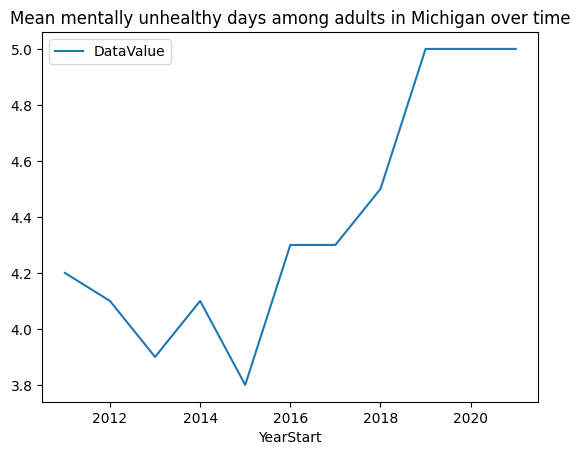

In [110]:
mental_health[(mental_health.DataValueType == 'Mean') & (mental_health.LocationDesc == 'Michigan') & (mental_health.Overall == 'Overall')].sort_values(by='YearStart').plot(x='YearStart', y='DataValue', kind='line')
_ = plt.title('Mean mentally unhealthy days among adults in Michigan over time')

In [116]:
alcohol[(alcohol.DataValueType == 'Mean') & (alcohol.LocationDesc == 'Michigan') & (alcohol.Overall == 'Overall') & (alcohol.Question == 'Binge drinking frequency among adults aged >= 18 years who binge drink')]

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall
40651,2018,2018,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,4.8,4.8,NaN,NaN,4.4,5.2,ALC3_0,MEAN,NaN,NaN,Overall
40861,2021,2021,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,5.0,5.0,NaN,NaN,4.4,5.7,ALC3_0,MEAN,NaN,NaN,Overall
40936,2017,2017,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,4.5,4.5,NaN,NaN,4.2,4.9,ALC3_0,MEAN,NaN,NaN,Overall
40957,2011,2011,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,4.5,4.5,NaN,NaN,4.1,4.9,ALC3_0,MEAN,NaN,NaN,Overall
40962,2013,2013,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,4.4,4.4,NaN,NaN,4.1,4.8,ALC3_0,MEAN,NaN,NaN,Overall
40994,2015,2015,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,4.8,4.8,NaN,NaN,4.2,5.4,ALC3_0,MEAN,NaN,NaN,Overall
41115,2014,2014,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,4.5,4.5,NaN,NaN,4.1,4.9,ALC3_0,MEAN,NaN,NaN,Overall
41118,2016,2016,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,4.6,4.6,NaN,NaN,4.2,5.0,ALC3_0,MEAN,NaN,NaN,Overall
41156,2019,2019,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,4.7,4.7,NaN,NaN,4.3,5.1,ALC3_0,MEAN,NaN,NaN,Overall
41210,2012,2012,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,4.3,4.3,NaN,NaN,3.9,4.7,ALC3_0,MEAN,NaN,NaN,Overall


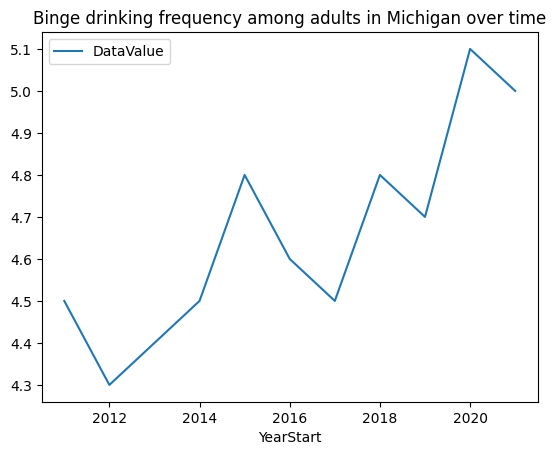

In [119]:
alcohol[(alcohol.DataValueType == 'Mean') & (alcohol.LocationDesc == 'Michigan') & (alcohol.Overall == 'Overall') & (alcohol.Question == 'Binge drinking frequency among adults aged >= 18 years who binge drink')].sort_values(by='YearStart').plot(x='YearStart', y='DataValue', kind='line')
_ = plt.title('Binge drinking frequency among adults in Michigan over time')

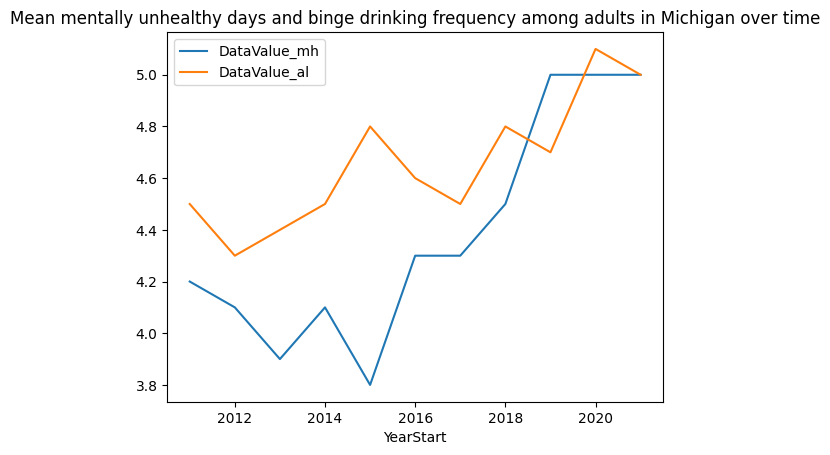

In [132]:
mh_mi = mental_health[(mental_health.DataValueType == 'Mean') & (mental_health.LocationDesc == 'Michigan') & (mental_health.Overall == 'Overall')]
al_mi = alcohol[(alcohol.DataValueType == 'Mean') & (alcohol.LocationDesc == 'Michigan') & (alcohol.Overall == 'Overall') & (alcohol.Question == 'Binge drinking frequency among adults aged >= 18 years who binge drink')]
mh_mi.merge(al_mi, on='YearStart', suffixes=('_mh', '_al'), how='inner').sort_values(by='YearStart').plot(x='YearStart', y=['DataValue_mh', 'DataValue_al'], kind='line')
_ = plt.title('Mean mentally unhealthy days and binge drinking frequency among adults in Michigan over time')

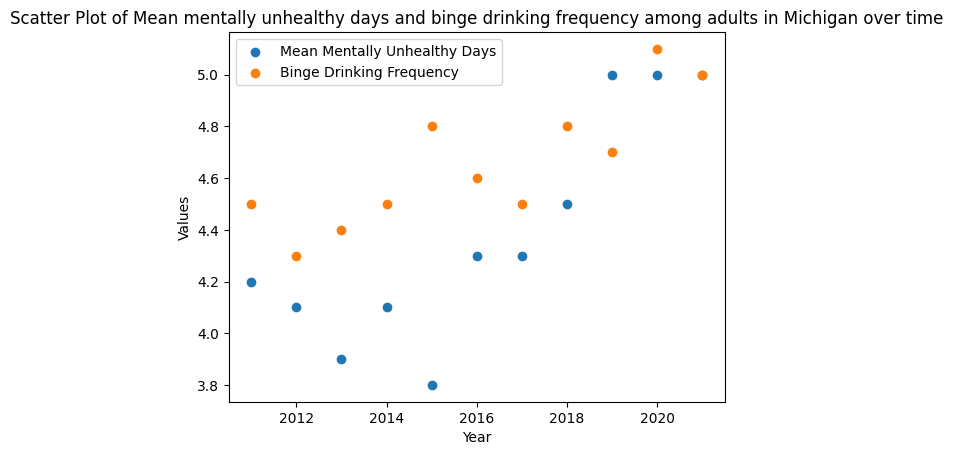

In [133]:
# Assuming your DataFrames are named mh_mi and al_mi
mh_mi = mental_health[(mental_health.DataValueType == 'Mean') & (mental_health.LocationDesc == 'Michigan') & (mental_health.Overall == 'Overall')]
al_mi = alcohol[(alcohol.DataValueType == 'Mean') & (alcohol.LocationDesc == 'Michigan') & (alcohol.Overall == 'Overall') & (alcohol.Question == 'Binge drinking frequency among adults aged >= 18 years who binge drink')]

# Merge the DataFrames
merged_df = mh_mi.merge(al_mi, on='YearStart', suffixes=('_mh', '_al'), how='inner').sort_values(by='YearStart')

# Create a scatter plot
plt.scatter(merged_df['YearStart'], merged_df['DataValue_mh'], label='Mean Mentally Unhealthy Days')
plt.scatter(merged_df['YearStart'], merged_df['DataValue_al'], label='Binge Drinking Frequency')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Scatter Plot of Mean mentally unhealthy days and binge drinking frequency among adults in Michigan over time')
plt.legend()
plt.show()